<a href="https://colab.research.google.com/github/Mou3098/Testing/blob/main/task1_GRIP_Sept_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The spark foundation
##Data Science and Business Analyst
##Task1

Import all the libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

Reading the dataset 

In [ ]:

df = pd.read_csv('https://bit.ly/w-data')

In [ ]:
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Describe the Dataset

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


See how many unique value in each feature

In [ ]:
df.nunique()

Hours     23
Scores    23
dtype: int64

Visualize relation between independent & dependent variables

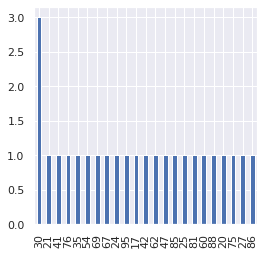

In [ ]:
df['Scores'].value_counts().plot.bar(figsize=(4,4))

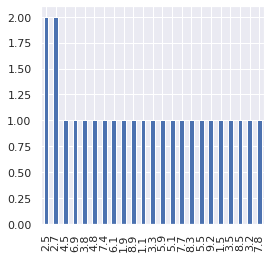

In [ ]:
df['Hours'].value_counts().plot.bar(figsize=(4,4))

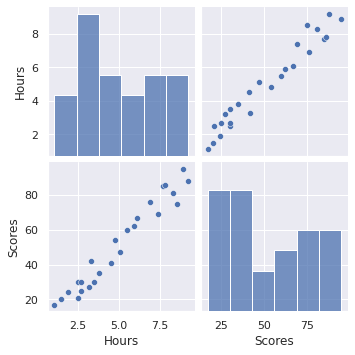

In [ ]:
sns.pairplot(df)

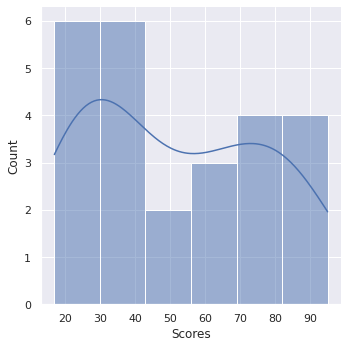

In [ ]:
sns.displot(df['Scores'],kde=True)

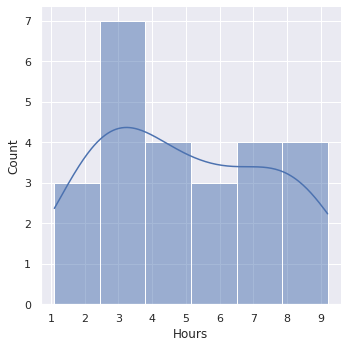

In [ ]:
sns.displot(df['Hours'],kde=True)

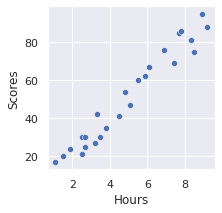

In [ ]:
sns.scatterplot(x=df['Hours'], y=df['Scores']); 

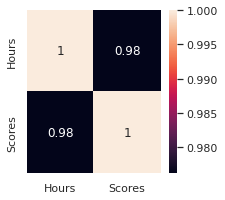

In [ ]:
sns.set(rc = {'figure.figsize':(3,3)})
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop(['Scores'],axis = 1)
Y = df['Scores']

Split the dataset

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3 ,random_state=0)

In visualization part ,there shows linear relation between 2 variable .so here implement linear regression.

In [ ]:

model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


Linear line

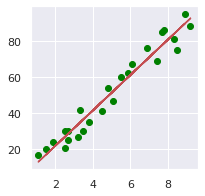

In [ ]:
line = model.coef_*X+model.intercept_
plt.scatter(X,Y,color='green')
plt.plot(X,line,'-r')
plt.show()

In [ ]:
print('Train accuracy:',model.score(X_train,y_train),'\nTest accuracy : ',model.score(X_test,y_test))

Train accuracy: 0.9484997422695115 
Test accuracy :  0.9568211104435257


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


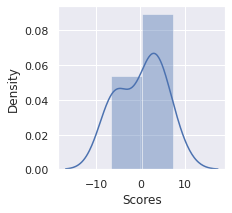

In [ ]:
sns.distplot((y_test-y_pred))

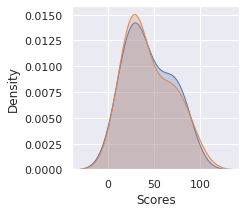

In [ ]:
sns.kdeplot(y_pred,label="Predicted", shade=True);

sns.kdeplot(data=y_test, label="Actual", shade=True);

predict 1 value

In [ ]:
h = [[9.25]]
s = model.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  92.91505723477056


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Error

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Square:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
R-Square: 0.9568211104435257
